In [225]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df = pd.read_csv('municipality_bus_utilization.csv')
df

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


In [227]:
df.describe()

,municipality_id,usage,total_capacity
count,13070.000000,13070.000000,13070.000000
mean,4.500000,876.002984,1972.800000
std,2.872391,679.287109,1144.074782
min,0.000000,11.000000,397.000000
25%,2.000000,403.000000,697.000000
50%,4.500000,692.000000,1974.500000
75%,7.000000,1190.000000,2947.000000
max,9.000000,3508.000000,3893.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13070 entries, 0 to 13069
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        13070 non-null  object
 1   municipality_id  13070 non-null  int64 
 2   usage            13070 non-null  int64 
 3   total_capacity   13070 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 408.6+ KB


In [229]:
df.isnull().sum()

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [230]:
df.columns

Index(['timestamp', 'municipality_id', 'usage', 'total_capacity'], dtype='object')

In [231]:
df = df.sort_values(['timestamp','municipality_id'],ascending=[True,True])
df

,timestamp,municipality_id,usage,total_capacity
3,2017-06-04 07:59:42,0,204,2813
7,2017-06-04 07:59:42,1,129,397
6,2017-06-04 07:59:42,2,273,697
9,2017-06-04 07:59:42,3,623,1930
2,2017-06-04 07:59:42,4,1090,3893
...,...,...,...,...
13064,2017-08-19 16:30:35,5,202,587
13068,2017-08-19 16:30:35,6,1680,3113
13067,2017-08-19 16:30:35,7,1354,2019
13066,2017-08-19 16:30:35,8,1193,2947


In [232]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp']

3       2017-06-04 07:59:42
7       2017-06-04 07:59:42
6       2017-06-04 07:59:42
9       2017-06-04 07:59:42
2       2017-06-04 07:59:42
                ...        
13064   2017-08-19 16:30:35
13068   2017-08-19 16:30:35
13067   2017-08-19 16:30:35
13066   2017-08-19 16:30:35
13063   2017-08-19 16:30:35
Name: timestamp, Length: 13070, dtype: datetime64[ns]

In [233]:
df

,timestamp,municipality_id,usage,total_capacity
3,2017-06-04 07:59:42,0,204,2813
7,2017-06-04 07:59:42,1,129,397
6,2017-06-04 07:59:42,2,273,697
9,2017-06-04 07:59:42,3,623,1930
2,2017-06-04 07:59:42,4,1090,3893
...,...,...,...,...
13064,2017-08-19 16:30:35,5,202,587
13068,2017-08-19 16:30:35,6,1680,3113
13067,2017-08-19 16:30:35,7,1354,2019
13066,2017-08-19 16:30:35,8,1193,2947


In [251]:
municipality_id = df.iloc[:,1:2].values
municipality_id = pd.DataFrame(data=municipality_id, columns = ['municipality_id'])

others = df.iloc[:,2:4].values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
impdata = others[:,:]
imputer = imputer.fit(impdata[:,:])
impdata[:,:] = imputer.transform(impdata[:,:])
finalothers = impdata[:,:]
print(finalothers)
finalothers = pd.DataFrame(data=finalothers, columns = ['usage', 'total_capacity'])
df = pd.concat([df['timestamp'], municipality_id], axis=1)
df = pd.concat([df, finalothers], axis=1)


[[ 204 2813]
 [ 129  397]
 [ 273  697]
 ...
 [1354 2019]
 [1193 2947]
 [ 815 1332]]


In [235]:
test_data = pd.DataFrame()
train_data = pd.DataFrame()

In [236]:
test_data=df[(df['timestamp'].dt.year==2017) & (df['timestamp'].dt.month==8) & (df['timestamp'].dt.day<=19) & (df['timestamp'].dt.day >=5) ] 
train_data = df[(df['timestamp'].dt.year!=2017) | (df['timestamp'].dt.month!=8) |  (df['timestamp'].dt.day>19) | (df['timestamp'].dt.day <5) ] 
train_data

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,0,204,2813
1,2017-06-04 07:59:42,1,129,397
2,2017-06-04 07:59:42,2,273,697
3,2017-06-04 07:59:42,3,623,1930
4,2017-06-04 07:59:42,4,1090,3893
...,...,...,...,...
10385,2017-08-02 16:32:54,5,114,587
10386,2017-08-02 16:32:54,6,1018,3113
10387,2017-08-02 16:32:54,7,1169,2019
10388,2017-08-02 16:32:54,8,1035,2947


In [237]:
test_data

,timestamp,municipality_id,usage,total_capacity
10390,2017-08-05 08:02:03,0,209,2813
10391,2017-08-05 08:02:03,1,141,397
10392,2017-08-05 08:02:03,2,286,697
10393,2017-08-05 08:02:03,3,610,1930
10394,2017-08-05 08:02:03,4,1782,3893
...,...,...,...,...
13065,2017-08-19 16:30:35,5,202,587
13066,2017-08-19 16:30:35,6,1680,3113
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,8,1193,2947


In [238]:
test_data0 = test_data[(test_data['municipality_id']==0)]
train_data0 = train_data[(train_data['municipality_id']==0)]

test_data1 = test_data[(test_data['municipality_id']==1)]
train_data1 = train_data[(train_data['municipality_id']==1)]

test_data2 = test_data[(test_data['municipality_id']==2)]
train_data2 = train_data[(train_data['municipality_id']==2)]

test_data3 = test_data[(test_data['municipality_id']==3)]
train_data3 = train_data[(train_data['municipality_id']==3)]

test_data4 = test_data[(test_data['municipality_id']==4)]
train_data4 = train_data[(train_data['municipality_id']==4)]

test_data5 = test_data[(test_data['municipality_id']==5)]
train_data5 = train_data[(train_data['municipality_id']==5)]

test_data6 = test_data[(test_data['municipality_id']==6)]
train_data6 = train_data[(train_data['municipality_id']==6)]

test_data7 = test_data[(test_data['municipality_id']==7)]
train_data7 = train_data[(train_data['municipality_id']==7)]

test_data8 = test_data[(test_data['municipality_id']==8)]
train_data8 =train_data[(train_data['municipality_id']==8)]

test_data9 = test_data[(test_data['municipality_id']==9)]
train_data9 = train_data[(train_data['municipality_id']==9)]


In [272]:
def isNun(num):
    return num != num


In [281]:
def fill_num(arr):
    for i in range(len(arr.values)):
        if isNun(arr.values[i]):
            arr.values[i] = arr.mean()
    return arr

In [282]:
finaldata = train_data.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()

finaldata0 = train_data0.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()

tsdata0 = train_data0.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()

tsdata0 = fill_num(tsdata0)
    

In [283]:
finaldata1 = train_data1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()

tsdata1 = train_data1.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata1 = fill_num(tsdata1)

In [284]:
finaldata2 = train_data2.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tsdata2 = train_data2.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata2 = fill_num(tsdata2)

finaldata3 = train_data3.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tsdata3 = train_data3.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata3 = fill_num(tsdata3)

finaldata4 = train_data4.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tsdata4 = train_data4.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata4 = fill_num(tsdata4)

finaldata5 = train_data5.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tsdata5 = train_data5.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata5 = fill_num(tsdata5)

finaldata6 = train_data6.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tsdata6 = train_data6.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata6 = fill_num(tsdata6)

finaldata7 = train_data7.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tsdata7 = train_data7.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata7 = fill_num(tsdata7)

finaldata8 = train_data8.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tsdata8 = train_data8.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata8 = fill_num(tsdata8)

finaldata9 = train_data9.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tsdata9 = train_data9.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tsdata9 = fill_num(tsdata9)

In [285]:
trydata = test_data.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()

trydata0 = test_data0.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata0 = test_data0.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata0 = fill_num(tstdata0)

trydata1 = test_data1.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata1 = test_data1.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata1 = fill_num(tstdata1)

trydata2 = test_data2.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata2 = test_data2.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata2 = fill_num(tstdata2)

trydata3 = test_data3.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata3 = test_data3.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata3 = fill_num(tstdata3)

trydata4 = test_data4.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata4 = test_data4.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata4 = fill_num(tstdata4)

trydata5 = test_data5.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata5 = test_data5.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata5 = fill_num(tstdata5)

trydata6 = test_data6.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata6 = test_data6.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata6 = fill_num(tstdata6)

trydata7 = test_data7.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata7 = test_data7.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata7 = fill_num(tstdata7)

trydata8 = test_data8.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata8 = test_data8.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata8 = fill_num(tstdata8)

trydata9 = test_data9.groupby([pd.Grouper(key='timestamp', freq='H'), 'municipality_id'], as_index=False)['usage'].max()
tstdata9 = test_data9.groupby([pd.Grouper(key='timestamp', freq='H')])['usage'].max()
tstdata9 = fill_num(tstdata9)

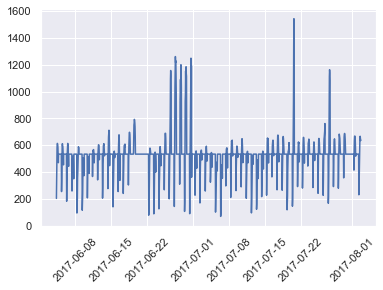

In [286]:

print()
sns.set()
plt.xticks(rotation=45)
plt.plot(tsdata0.index, tsdata0, )


# Autoregressive Moving Average (ARMA)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


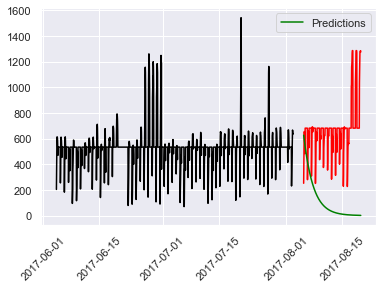

In [287]:
# MUNICIPALITY_ID = 0
from statsmodels.tsa.statespace.sarimax import SARIMAX
Armamodel = SARIMAX(tsdata0)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata0.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata0.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata0, color = "black")
plt.plot(tstdata0, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [288]:
from sklearn.metrics import mean_squared_error
arma_rmse = np.sqrt(mean_squared_error(tstdata0, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  633.5947143229093


C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  272.18859175438814


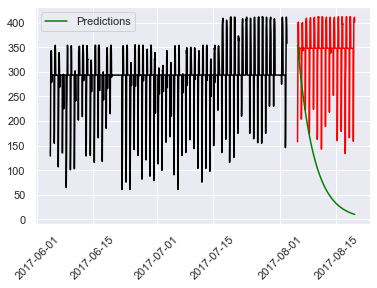

In [289]:
# MUNICIPALITY_ID = 1
Armamodel = SARIMAX(tsdata1)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata1.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata1.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata1, color = "black")
plt.plot(tstdata1, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata1, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  317.056020059483


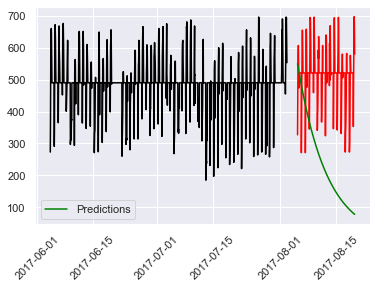

In [291]:
# MUNICIPALITY_ID = 2
Armamodel = SARIMAX(tsdata2)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata2.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata2.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata2, color = "black")
plt.plot(tstdata2, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata2, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  927.9736527575519


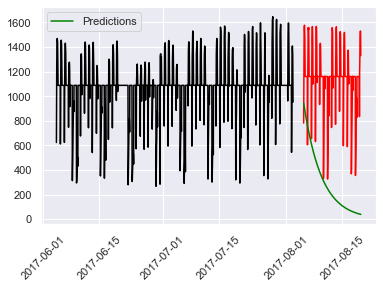

In [292]:
# MUNICIPALITY_ID = 3
Armamodel = SARIMAX(tsdata3)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata3.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata3.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata3, color = "black")
plt.plot(tstdata3, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata3, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  2076.3235333917137


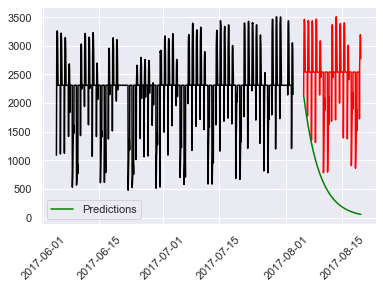

In [290]:
# MUNICIPALITY_ID = 4
Armamodel = SARIMAX(tsdata4)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata1.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata4.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata4, color = "black")
plt.plot(tstdata4, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata4, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  174.41915269386385


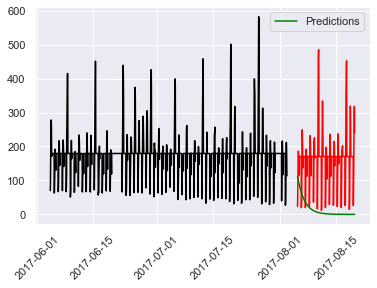

In [293]:
# MUNICIPALITY_ID = 5
Armamodel = SARIMAX(tsdata5)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata5.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata1.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata5, color = "black")
plt.plot(tstdata5, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata5, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  816.993771976646


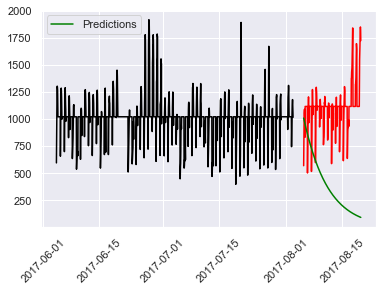

In [297]:
# MUNICIPALITY_ID = 6
Armamodel = SARIMAX(tsdata6)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata6.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata6.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata6, color = "black")
plt.plot(tstdata6, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata6, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  813.7300324590249


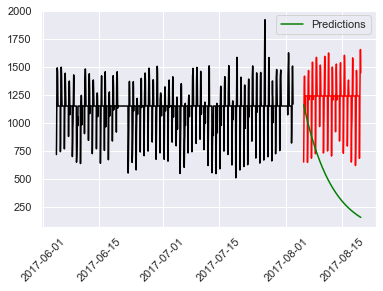

In [298]:
# MUNICIPALITY_ID = 7
Armamodel = SARIMAX(tsdata7)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata7.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata7.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata7, color = "black")
plt.plot(tstdata7, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata7, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  727.3025130026887


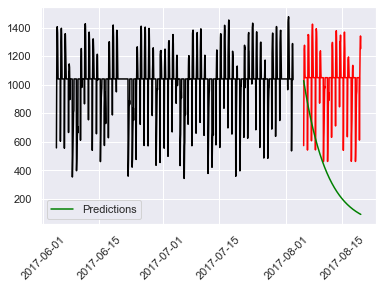

In [296]:
# MUNICIPALITY_ID = 8
Armamodel = SARIMAX(tsdata8)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata8.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata8.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata8, color = "black")
plt.plot(tstdata8, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata8, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  522.2132353509897


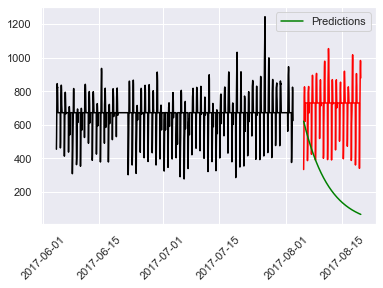

In [299]:
# MUNICIPALITY_ID = 9
Armamodel = SARIMAX(tsdata9)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata9.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata9.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata9, color = "black")
plt.plot(tstdata9, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata9, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

# Autoregressive Integrated Moving Average (ARIMA)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  75.9301955915114


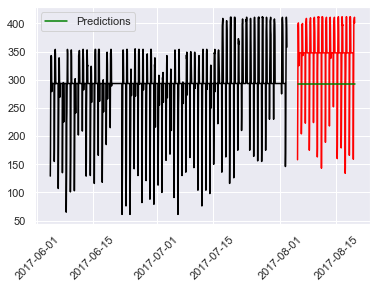

In [302]:
# MUNICIPALITY_ID = 1
from statsmodels.tsa.arima.model import ARIMA
Armamodel = ARIMA(tsdata1)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata1.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata1.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata1, color = "black")
plt.plot(tstdata1, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata1, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  82.46737996436929


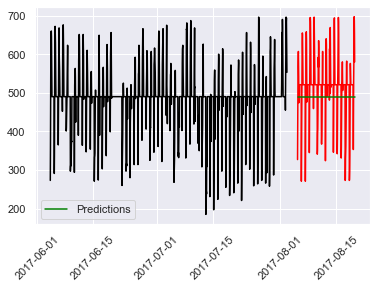

In [303]:
# MUNICIPALITY_ID = 2
Armamodel = ARIMA(tsdata2)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata2.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata2.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata2, color = "black")
plt.plot(tstdata2, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata2, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  561.8277047189606


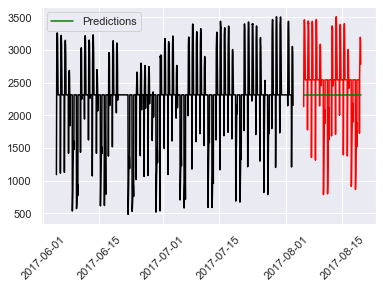

In [304]:
# MUNICIPALITY_ID = 4
Armamodel = ARIMA(tsdata4)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata1.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata4.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata4, color = "black")
plt.plot(tstdata4, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata4, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  69.77093267758421


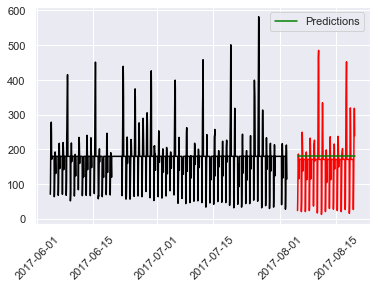

In [305]:
# MUNICIPALITY_ID = 5
Armamodel = ARIMA(tsdata5)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata5.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata1.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata5, color = "black")
plt.plot(tstdata5, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata5, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  215.05235280125717


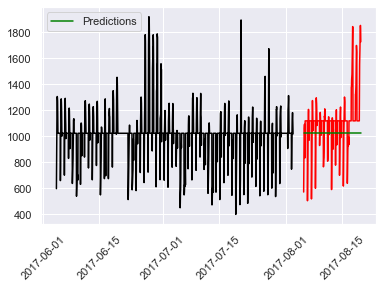

In [306]:
# MUNICIPALITY_ID = 6
Armamodel = ARIMA(tsdata6)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata6.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata6.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata6, color = "black")
plt.plot(tstdata6, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata6, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  203.54212680889393


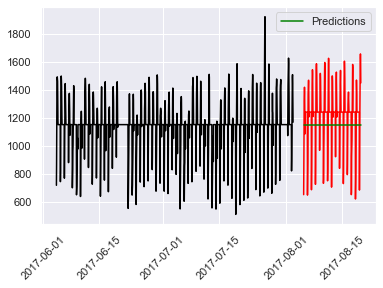

In [307]:
# MUNICIPALITY_ID = 7
Armamodel = ARIMA(tsdata7)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata7.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata7.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata7, color = "black")
plt.plot(tstdata7, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata7, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  176.48398075379893


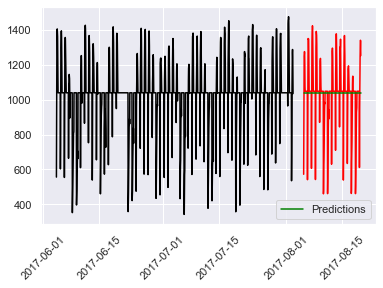

In [308]:
# MUNICIPALITY_ID = 8
Armamodel = ARIMA(tsdata8)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata8.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata8.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata8, color = "black")
plt.plot(tstdata8, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata8, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

C:\Users\suha\Anaconda3\envs\carbon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


RMSE:  128.85467915209082


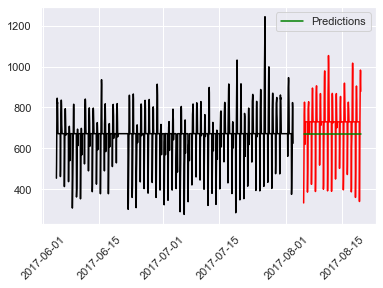

In [309]:

Armamodel = ARIMA(tsdata9)
ARMAmodel = Armamodel.fit()

y_pred = ARMAmodel.get_forecast(len(tstdata9.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = tstdata9.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(tsdata9, color = "black")
plt.plot(tstdata9, color = "red")
plt.xticks(rotation=45)
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(tstdata9, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)
